[A Comprehensive Guide To Visualizing and Analyzing DICOM Images in Python](https://medium.com/@hengloose/a-comprehensive-starter-guide-to-visualizing-and-analyzing-dicom-images-in-python-7a8430fcb7ed)

In [1]:
import workflow.dicom_workflow as workflow
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy

In [ ]:
os.environ["dicom_path"] = "C:/ntpu_project/LIDC-IDRI/"

In [3]:
# workflow.get_directory()

In [4]:
#workflow.dicom_directory

In [2]:
os.environ["dicom_path"] = "C:/ntpu_project/LIDC-IDRI/LIDC-IDRI-1011/"

In [3]:
workflow.run()

reading total...1/1 patient folders
Worker 1: C:/ntpu_project/LIDC-IDRI/LIDC-IDRI-1011/01-01-2000-CT THORAX WCONTRAST-94040/2-CHEST-06815/
C:/ntpu_project/LIDC-IDRI/LIDC-IDRI-1011/01-01-2000-CT THORAX WCONTRAST-94040/2-CHEST-06815/087.xml
reading total...50/133 patient DICOMs
reading total...100/133 patient DICOMs
reading total...133/133 patient DICOMs
same result!!!!!!!!!!!
same result!!!!!!!!!!!
1.3.6.1.4.1.14519.5.2.1.6279.6001.193715981207740465635852316394 nodule_type NODULE_GREATER_THAN_3MM
same result!!!!!!!!!!!
same result!!!!!!!!!!!
same result!!!!!!!!!!!
same result!!!!!!!!!!!
same result!!!!!!!!!!!
same result!!!!!!!!!!!
1.3.6.1.4.1.14519.5.2.1.6279.6001.456127109393489787435570763700 distance >= 5, (382.58677685950414, 249.27272727272728) & (378.97435897435895, 254.74358974358975)
has_only_one_result
same result!!!!!!!!!!!
1.3.6.1.4.1.14519.5.2.1.6279.6001.271598078776433645837246573410 nodule_type NODULE_GREATER_THAN_3MM
same result!!!!!!!!!!!
same result!!!!!!!!!!!
1.3.6.

In [4]:
print(len(workflow.mapped_ct_dicom_list))
print(len(workflow.mapped_ct_dicom_list_unmatched))
print(len(workflow.un_mapped_ct_dicom_list))

18
6
109


In [5]:
dicom = workflow.mapped_ct_dicom_list[0]
image = copy.deepcopy(dicom.pixel_array)
nodule_list = dicom.nodule_list
#for nodule in nodule_list:
#    print([edge for edge in nodule.edge_map_list])
print(f'is same result = {dicom.is_same_examination_result}')
print(f'rescale_slope = {dicom.rescale_slope}')
print(f'rescale_intercept = {dicom.rescale_intercept}')

is same result = True
rescale_slope = 1
rescale_intercept = -1024


In [6]:
print(dicom.full_path)

C:/ntpu_project/LIDC-IDRI/LIDC-IDRI-1011/01-01-2000-CT THORAX WCONTRAST-94040/2-CHEST-06815/000009.dcm


In [7]:
import matplotlib.pyplot as plt
import numpy as np

from numpy.random import randn
import time

In [8]:
#hu_image = dicom.transform_to_hu()
hu_image = dicom.window_image(50, 350)

225.0
-125.0


In [9]:
print(np.max(hu_image))
print(np.min(hu_image))
np.shape(hu_image)

225.0
-125.0


(128, 128)

800.0
-1200.0


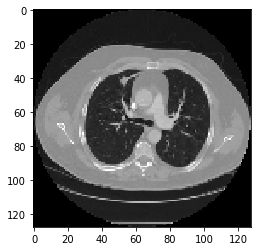

In [10]:
lung_image = dicom.window_image(-200, 2000)
plt.imshow(lung_image, cmap=plt.cm.gray)

225.0
-125.0


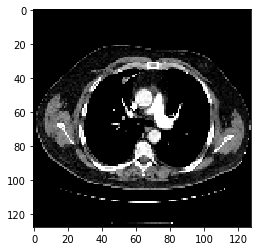

In [11]:
soft_tissue_image = dicom.window_image(50, 350)
plt.imshow(soft_tissue_image, cmap=plt.cm.gray)

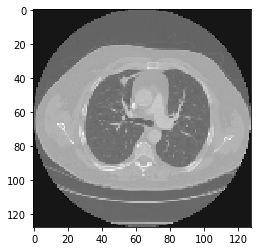

2082
-1320


IndexError: index 159 is out of bounds for axis 0 with size 128

In [15]:
# 將診斷為 nodule edge 的周遭用 1024 (白) 去圈起來
size = len(dicom.nodule_list)
plt.imshow(image, cmap=plt.cm.gray)
plt.show()
temp_pixel_array = None
for i, nodule in enumerate(dicom.nodule_list):
    # print(f'{0 if (i/2)<1 else 1}, {(i%2)}')
    temp_pixel_array = copy.deepcopy(image)
    # lung windowing
#     temp_pixel_array[temp_pixel_array < -1200] = -1200
#     temp_pixel_array[temp_pixel_array > 800] = 800
    # soft tissue windowing
#     temp_pixel_array[temp_pixel_array < -125] = -125
#     temp_pixel_array[temp_pixel_array > 225] = 225
    print(np.max(temp_pixel_array))
    print(np.min(temp_pixel_array))
    for edge in nodule.edge_map_list:
#        print(f'int(edge.x) = {int(edge.x)}, int(edge.y) = {int(edge.y)}')
       temp_pixel_array[int(edge.y), int(edge.x)] = np.max(image) * 3
    #plt.imshow(dicom.pixel_array, cmap=plt.cm.gray)
    plt.imshow(temp_pixel_array, cmap=plt.cm.gray)
    plt.show()

In [12]:
import pickle

# pickle a variable to a file
file = open('C:/ntpu_project/pickle_example.pickle', 'wb')
target_dicom = list()
target_dicom.extend(workflow.mapped_ct_dicom_list)
target_dicom.extend(workflow.un_mapped_ct_dicom_list)
pickle.dump(target_dicom, file)
file.close()

In [ ]:
# reload a file to a variable
with open('C:/ntpu_project/pickle_example.pickle', 'rb') as file:
    dicom_list =pickle.load(file)

print(dicom_list)

In [ ]:
dicom = dicom_list[0]
image = copy.deepcopy(dicom.pixel_array)
nodule_list = dicom.nodule_list
#for nodule in nodule_list:
#    print([edge for edge in nodule.edge_map_list])
print(f'is same result = {dicom.is_same_examination_result}')
print(f'rescale_slope = {dicom.rescale_slope}')
print(f'rescale_intercept = {dicom.rescale_intercept}')

In [ ]:
# TODO: model training
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:
# prepair data for CNN
all_imgs = [dicom.standardlize() for dicom in dicom_list]
x = np.stack(all_imgs)
# 標記 edge 到 y 中
y = list()
for dicom in dicom_list:
    img_y = np.zeros(np.shape(dicom.pixel_array))
    edge = np.array([[int(edge.x), int(edge.y)] for edge in dicom.nodule_list[0].edge_map_list])
    img_y[tuple(edge.T)] = 1
    y.append(img_y)

# for edge in dicom.nodule_list[0].edge_map_list:
#     print(y[int(edge.x), int(edge.y)])

In [ ]:
print(np.shape(x))
print(np.shape(y))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2100, shuffle=True)
y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

In [ ]:
print(dicom.full_path)
print(dicom.pixel_array[:300])
print(image.min())
print(image.max())

In [ ]:
from scipy.ndimage import filters
import tensorflow as tf
import cv2

In [ ]:
### kernel_size = 5
 
# 使用numpy建立 5*5且值為1/(5**2)的矩陣作為kernel。
 
kernel_x = np.array([
    [-1, -4, -6, -4, -1],
    [-2, -8, -12, -8, -2],
    [0, 0, 0, 0, 0],
    [2, 8, 12, 8, 2],
    [1, 4, 6, 4, 1],
])

kernel_y = np.array([
    [1, 2, 0, -2, -1],
    [4, 8, 0, -8, -4],
    [6, 12, 0, -12, -6],
    [4, 8, 0, -8, -4],
    [1, 2, 0, -2, -1],
    
])
 
# 使用cv2.filter2D進行convolute，
 
result_x = cv2.filter2D(soft_tissue_image, ddepth=-1 , dst=-1, kernel=kernel_x, anchor=(-1, -1), delta=0, borderType=cv2.BORDER_DEFAULT)
result_y = cv2.filter2D(soft_tissue_image, -1 , kernel_y)
 
# cv2.imshow("Filter", result)
# cv2.imshow("Original", image)
 
print(np.max(result_x))
print(np.min(result_x))
print(np.max(result_y))
print(np.min(result_y))

plt.imshow(image, cmap=plt.cm.gray)
plt.show()
plt.imshow(result_x, cmap=plt.cm.gray)
plt.show()
temp_y = copy.deepcopy(result_y)
plt.imshow(temp_y, cmap=plt.cm.gray)
plt.show()